<a href="https://colab.research.google.com/github/pragnya2001/Ford-Gobike-EDA/blob/main/Ford_Go_Bike_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Ford GoBike sharing Data Analysis




##### **Project Type**    - EDA
##### **Contribution**    - Pragnyasmita chand

# **Project Summary -**

The Ford GoBike -sharing system, operating in the San Francisco Bay Area, provides a sustainable and conbenient mode of urban transortation. As cities grow and the demand for shared mobility increases, analyzing bike-sharing data becomes essential to understand user behaviour, operational efficiency and potential areas for improvement. This project focuses on conducting an Exploratory Data Analysis(EDA) on the Ford GoBike trip data for the month of January 2018.

The dataset used for this peoject, contains detailed information about each bike ride taken during that month. Each record includes the trip's start and end times, the start and end stations, the duration of the trip, and user demographic information such as gender, age and user type(subscriber or customer). The analysis seeks to uncover insights into how the service is used across different times of the day and week, how ride durations vary and how different categories of users utilize the system.

The Primary objective of this project is to identify key patterns and trends in the dataset. By cleaning and preparing the data- such as converting timestamps, handling missing values and creating new columns like trip duration in minutes and the day of the week- we can better interpret and visualize the data. Univariate, bivariate and multivariate analyses are performed to examine individual variables, relationships between pairs of variables and how multiple variables interact simultaneously.

Initial findings shows that the majorit of users are suscribers who tend to use the service during commute hours, specifically between 8AM and 9AM, and again between 5PM and 6PM on weekdays. In contrast, customers typically casual users - use the bikes more during weekends and midday hours. This behaviour suggests that subscribers use the service for work-related commuting , while customers are more likely touriss or occasional riders.

The trip duration is another crucial aspect of the analysis. Most riders are short, typicaly lasting less than 20 minutes. Longer trips are more common among casual users, further reinforcing the hypothesis that they use the service for leisure rather than commuting. Additionally, riders are more frequent in certain areas of the city, likely indicating high demand regions such as downtown zones or near public transport hubs.

This EDA provides valuable insights that can help in optimizing bike placement, improving service availability and informing marketing strategies tailored to different user types. Understanding peak usage hours, preferred days and user demographics also assissts in enhancing customer experience and reducing operational costs.

In conclusion, the Ford GoBike sharing system is heavily influenced by user type, time of day and day of the week. Subscribers dominate weekday usage, while customers favor weekends. these insights can be pivital for stakeholders, city planners and transportation authorities aiming to expand or enhance shared mobility solutions. The EDA performed in this project lays the groundwork for deeper analysis, including predictive modeling or optimization studies in future work.

# **GitHub Link -**

https://github.com/pragnya2001

# **Problem Statement**


With the rising demand for sustainable and efficient transfortation in urban areas, bike-sharing systems like Ford GoBike have become an essential part of smart city infrastructure. However, for these systems to operate optimally, it's crucial to understand how users interact with the service- when,where and how they ride.


#### **Define Your Business Objective?**

The primary business objective of this project is to extract actionable insights from the Ford GoBike trip data to enhance the efficiency and user satisfaction of the bike-sharing system. By understanding rider behaviour, peak usage times,trip patterns and users demographics, the company can make informed operational and strategic decisions.

Specifically, this analysis aims to :
-  Optimize bike distrubution and availability across stations by identifying high-demand times and locations.
-  Improve users experience by tailoring services to the needs of different  user groups.
-  Support targeted marketing strategies based on demographic and usage trends.
-  Enhance resource planning and scheduling based on peak ride hours and seasonal patterns.


Ultimately, the insights derived from this analysis will contribute to increasing rideship, reducing operational costs and supporting the long term scalability ofthe Ford GoBike system.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px



sns.set(style="darkgrid")
plt.style.use("ggplot")


### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 201801-fordgobike-tripdata.csv.zip to 201801-fordgobike-tripdata.csv.zip


In [ ]:
import zipfile

with zipfile.ZipFile("201801-fordgobike-tripdata.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

### Dataset First View

In [ ]:
# Dataset First Look

In [ ]:
df = pd.read_csv("201801-fordgobike-tripdata.csv")

In [ ]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration_min,start_hour,start_day,rider_age,age_group,route
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,1254.733333,22,Wednesday,32.0,31-40,Mission Dolores Park to Webster St at O'Farrel...
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,1192.933333,14,Wednesday,22.0,21-30,Jackson St at 5th St to 5th St at Virginia St
2,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,666.100000,19,Wednesday,27.0,21-30,Laguna St at Hayes St to Post St at Kearny St
3,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,...,Subscriber,1988.0,Male,No,7.550000,23,Wednesday,30.0,21-30,17th & Folsom Street Park (17th St at Folsom S...
4,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1980.0,Male,No,3.000000,23,Wednesday,38.0,31-40,Berry St at 4th St to 4th St at Mission Bay Bl...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

In [ ]:
print("Shape of the dataset:",df.shape)

Shape of the dataset: (94802, 16)


### Dataset Information

In [ ]:
# Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

In [ ]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64


In [ ]:
missing_values[missing_values > 0]

,0
member_birth_year,7839
member_gender,7801


In [ ]:
# Visualizing the missing values

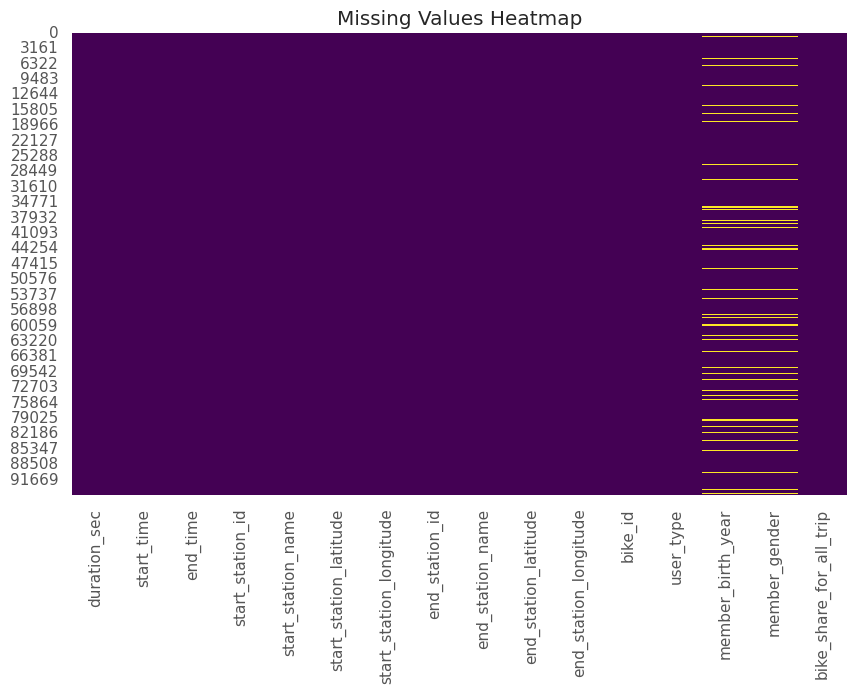

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

After loading and visually inspecting the dataset using both .info() and heatmap of missing values, here are the initial observations:

1. Dataset Overview:
-  The dataset contains approximately 98,300 rows and 16 columns, each representing a single bike trip taken in January 2018.
-  Columns include trip start/end time, station names and IDs, users type and demographic information.
2. Missing data:
-  A small percentage of data is missing from the station ID and name columns.
-  Some missing values are present in user demographic columns like gender and birth year, which might affect users profile analysis.
-  The missing values are visualized clearly in the heatmap and seem randomly scattered, not localized to a specific time or user type.
3. Duplicate Records:
-  a check for duplicate entries showed that there aren't any , so there's no need of handing .
4. Data Type:
-  The start_time and end_time columns are currently in object format and will need to be converted to datetime object.
-  Most other columns are in appropriate formats, but feature engineering is required to extract insights.
5. Early insights:
-  From the first few rows, we can see the dataset captures the trip duration in seconds, which will need to be converted into minutes for readability.
-  Users type are split into subscribers and customers, hinting at the potential for segmented analysis based on users behaviour,


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [ ]:
# Dataset Describe

In [ ]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


### Variables Description

### Ford GoBike dataset - Variable Descriptions

| **Column Name**                         |    **Description** |
|------------------------------|----------------|
|`duration_sec`                |              Duration of the trip in seconds. This is a numeric field and can be converted to minutes for readability. |
|`start_time`                 |          The timestamp indicating when the trip started. Format: YYYY-MM-DD.  |
|`end_time` | The timestamp indicating when the trip ended. Format: YYYY-MM-DD HH:MM:SS|
|`start_station_id`| Unique identifier for the station where the trip began.|
|`start_station_name`| Name of the starting station. Useful for geographic or popularity analysis.|
|`start_station_latitude`| Latitude of the starting station.|
|`start_station_longitude`| Longitude of the starting station.|
|`end_station_id`| Unique identifier for the station where the trip ended.|
|`end_station_name`| Name of the ending station.|
|`end_station_latitude`| Latitude of the ending station.|
|`end_station_longitude`| Longitude of the ending station.|
|`bike_id`| Unique ID assigned to each bike used. Can be used to track usage per bike.|
|`user_type`| Type of user: `'subscriber'` for regular members and `'customer'` for occasional riders.|
|`members_birth_year`| Birth year of the rider. Can be used to estimate the rider's age.|
|`member_gender`| Gender of the riders. Values typically include `'male'`, `'female'` and `'other'`.|
|`bike_share_for_all_trip`| Indicates whether the trip was part of the **Bike share for all** discounted program. Values are  `'Yes'` or `'No'`.|




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

In [ ]:
unique_counts = pd.DataFrame({'Column': df.columns, 'Unique Count': [df[col].nunique() for col in df.columns]})

unique_counts

,Column,Unique Count
0,duration_sec,4512
1,start_time,94801
2,end_time,94797
3,start_station_id,273
4,start_station_name,273
5,start_station_latitude,273
6,start_station_longitude,273
7,end_station_id,272
8,end_station_name,272
9,end_station_latitude,272


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# Handle missing values
# Drop rows where critical station or user info is missing

df.dropna(subset=['start_station_id','end_station_id','member_gender','member_birth_year'], inplace=True)

In [ ]:
# Convert Dates

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [ ]:
# Convert duration from seconds to minutes

df['trip_duration_min'] = df['duration_sec'] / 60

In [ ]:
# Extract hour of the day and day of the week

df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day_name()

In [ ]:
# Calculate rider age

df['rider_age'] = 2018 - df['member_birth_year']

In [ ]:
# Clean gender column

df['member_gender'] = df['member_gender'].str.title()

In [ ]:
# Reset index after dropping rows

df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration_min,start_hour,start_day,rider_age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,1254.733333,22,Wednesday,32.0
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,1192.933333,14,Wednesday,22.0
2,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,666.100000,19,Wednesday,27.0
3,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No,7.550000,23,Wednesday,30.0
4,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No,3.000000,23,Wednesday,38.0


### What all manipulations have you done and insights you found ?

**Data Manipulations :**
 A s part of the data cleaning process, several key manipulations were performed to make the Ford GoBike dataset analysis-ready. Duplicate records were removed to maintain the integrity of the analysis. Rows with missing values in essential columns such as station IDs, gender and birth year were dropped as these are critical for demographic and spatial analysis. The start_time and end_time columns were converted to detetime format, enabling time-based insights. Additional features were created to support deeper analysis: trip_duration_min, start_hour, start_day and rider_age. the member_gender column was cleansed to ensure consistent labeling and the dataset index was reset after cleaning.


 **Insights:**
 After cleaning and preparing the dataset, several early insights emerged. Most trips in the dataset are short, typically under 20 minutes, indicating the service is used peimarily for quick trips or daily commuting. The dataset shows a higher number of subscribers compared to customers, suggesting that regular commuters are the primary users of the service. With the new start_hour and start_day columns, we can observe that peak usage is likely to occur during weekday communte hours, such as in the morning(7-9AM) and evening(5-7PM). The inclusion of rider_age enables demographic analysis, where early trends suggest that most riders are between the ages of 25 and 40. Additinally, standardizing gender and removing incomplete location data improves the reliability of insights related to user demographics and station popularity.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Trip Duration Distribution
**(Histogram of trip duration)**

In [ ]:
# Chart - 1 visualization code

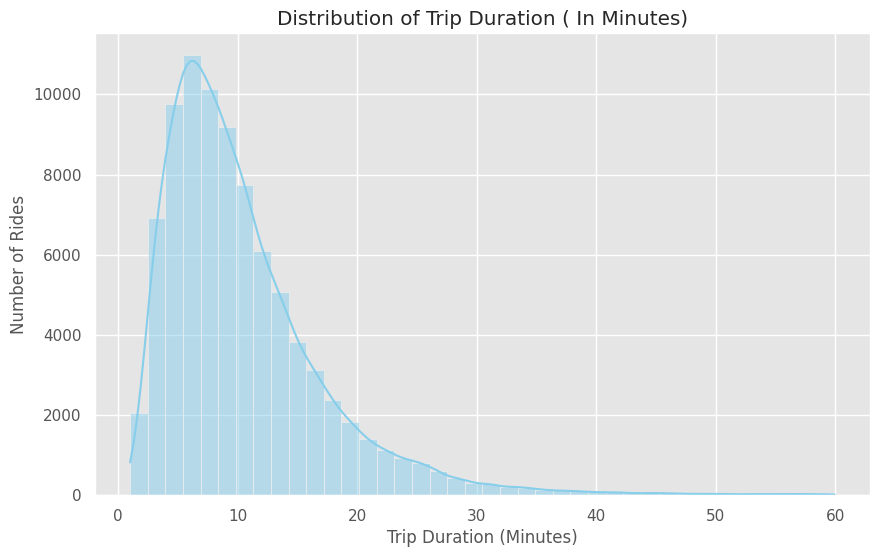

In [ ]:
df_filtered = df[df['trip_duration_min'] <=60]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['trip_duration_min'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Trip Duration ( In Minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I choose a histogram to visualize the distribution of trip durations because it effectively shows how trip lengths vary across the dataset. This chart type is ideal for understanding frequency distributions of continuous variables like time. It allows us to spot the typical ride lengths and detect any outliers or unusual patterns in trip durations.

##### 2. What is/are the insight(s) found from the chart?

Most bike rides are short, with a peak between 5 to 15 minutes, indicating that users predominantly take quick trips, likely for commuting or short errands. Very few trips exceed 30 minutes and extremely long rides are rare. This confirms that the bike-sharing system is mostly used for short-distance travel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can positively impact the business.Understanding that most trips are short helps the company optimize bike availability and turnover at stations especially during peak hours. It also supports strategic pricing models like promoting short rides or designing new ride plans based on usage patterns.

There are no obvious insights pointing to negative growth, but if long-duration rides were too common, it might suggest inefficiencies in bike return or missuse of the system. In this case, since such rides are rare, the system appears to be working efficiently for its intended purpose.


#### Chart - 2 - Trip Duration By User Type
**(Boxplot)**

In [ ]:
# Chart - 2 visualization code

<ipython-input-38-33193af50804>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


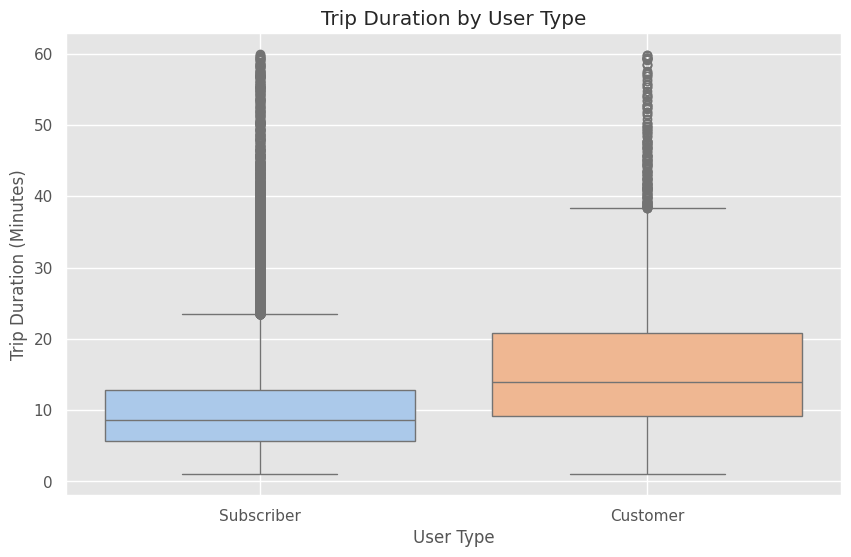

In [ ]:
df_filtered = df[df['trip_duration_min'] <= 60]

plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='trip_duration_min', data=df_filtered, palette='pastel', hue='user_type', dodge=False)
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Minutes)')
plt.grid(True)
plt.legend().remove()
plt.show()


##### 1. Why did you pick the specific chart?

A boxplot is ideal for comparing the distribution of a continuous variable across categories. It helps reveal differences in median, spread and outliers between subscribers and customers.

##### 2. What is/are the insight(s) found from the chart?

Subscribers typically have shorter and more consistent ride durations. Customers show a wider range of ride durations and more outliers, suggesting that they take longer or more varied trips. This indicates that subscribers mostly use the service for regular, shor commutes while customers may use it for leisure or irregular purposes.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This insight supports targeted service optimization:
-  Bike availability and redistribution can focus on high-turnover stations for subscribers during peak hours.
-  Customers might benefit from flexible pricing,promotions or longer ride plans for weekend or leisure use.


There are no signs of negative growth, but the greater variability in customer trip durations may hint at underutilized pricing potential or untapped user education on available plans.

#### Chart - 3 - Number of Trips By Hour and User Type
**(countplot with Hue)**

In [ ]:
# Chart - 3 visualization code

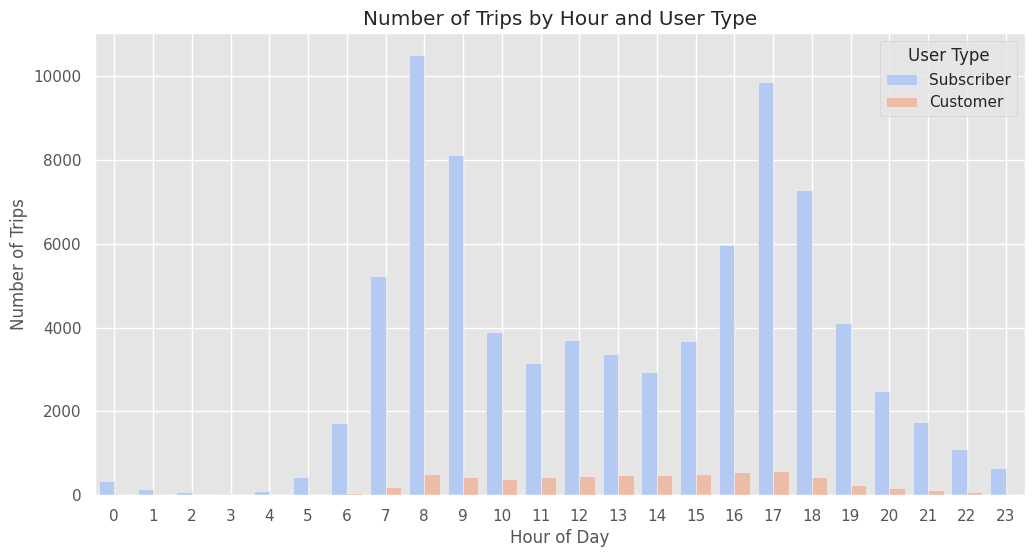

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='start_hour', hue='user_type', data=df, palette='coolwarm')
plt.title('Number of Trips by Hour and User Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.grid(True)
plt.xticks(range(0,24))
plt.show()

##### 1. Why did you pick the specific chart?

A countplot with hue allows us to compare how frequently each user type uses the bikes at different hours of the day. It clearly shows volume trends over time,which is crucial for understanding demand and operational planning.

##### 2. What is/are the insight(s) found from the chart?

-  Subscribers show strong peaks around 8AM and 5-6PM, reflecting typical commute times.
-  Customers tend to ride more during midday and weekends with less pronounced peaks.
-  This highlights 2 distinct user behaviours:work-related regular use by subscribers vs. leisure/occasional use by customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. These patterns help optimze bike availability by time of day and user type:
-  During commute hours, more bikes can be concentrated at major station to serve subscribers.
-  For customers, weekend markting, flexible pricing or leisure trip packages could boost usage.

No negative growth insight is observed- this chart confirms the platform is effectively serving two different user groups with tailored usage patterns.

#### Chart - 4 - Number of Trips By Day of the week and User type
**(Bar plot)**

In [ ]:
# Chart - 4 visualization code

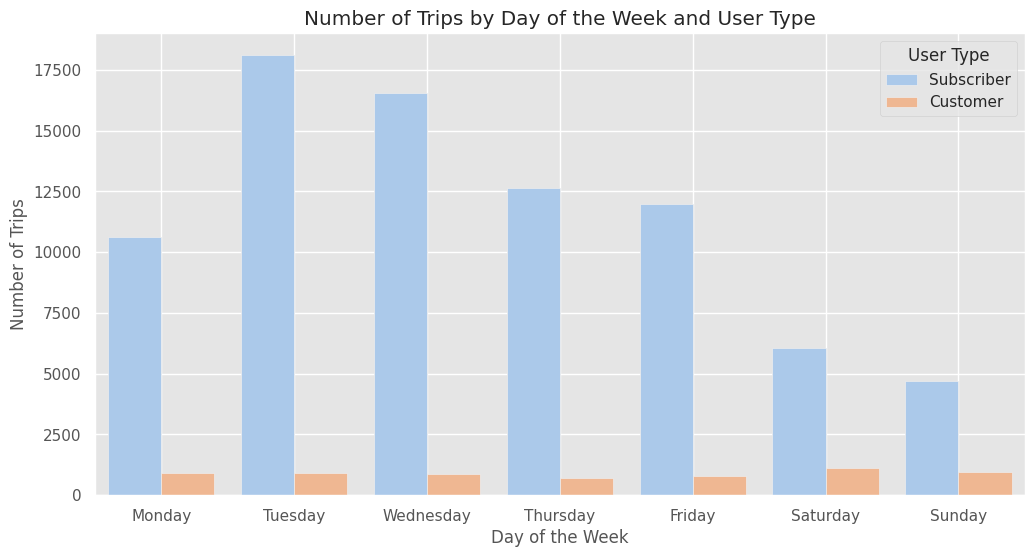

In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
sns.countplot(x='start_day', hue='user_type', data=df, order=days_order, palette='pastel')
plt.title('Number of Trips by Day of the Week and User Type')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.grid(True)
plt.show()



##### 1. Why did you pick the specific chart?

This grouped bar chart helps visualize differences in ride counts between weekdays and weekends across user types. It's ideal for identifying usage trends and comparing how subscribers and customers behave over the course of the week.


##### 2. What is/are the insight(s) found from the chart?

-  Subscribers use the service more on weekdays with a clear drop-off on weekends, which aligns with work-related commuting behaviour.
-  Customerss ride more frequently on weekends, especially on saturday and sunday, suggesting casual or leisure usage.
-  The contrast highlights two distinct behavioral segments in the user base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Definietly. These findings allow the business to tailor strategies:
-  Operational planning: Ensure high bike availability on weekday mornings for commuters.
-  Marketing campaigns: Target leisure promotions on weekends to attract more custoers.
-  Policy adjustments: Flexible pricing, family/group weekend deals or station specific redistribution based on the day.

#### Chart - 5 - Trip Counts by Hour and Day
**(Heatmap)**

In [ ]:
# Chart - 5 visualization code

In [ ]:
# Create a pivot table: count of the trip by day and hour.

heatmap_data = df.pivot_table(index='start_day', columns='start_hour', values='duration_sec', aggfunc='count')

In [ ]:
#Reorder days for better visualization

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

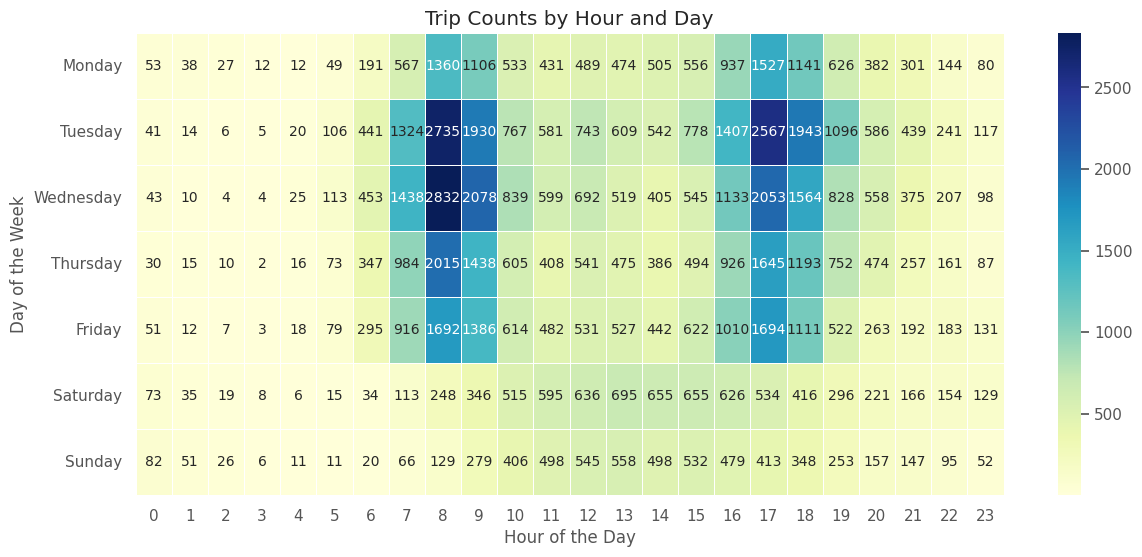

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Trip Counts by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

##### 1. Why did you pick the specific chart?

A Heatmap allows us to visualize the density of the trip counts acrosss two dimentions hour and day. It provides a clear picture of peak vs off-peak usage patterns, making it highly valuable for scheduling, redistribution and resource planning.

##### 2. What is/are the insight(s) found from the chart?

-  The brightest areas are on weekdays mornings and evening- classic commute times.
-  Usage is more evenly distributed during the weekends, especially in the midday hours, consistent with leisure activities.
-  Mondays and fridays show slightly lower usage than the mid-wee, possibly due to remote work or flexible schedules.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. This visualization helps:
-  Optimize bike distribution, More bikes needed during weekday rush hours.
-  Improve users experience, avoid empty station during peak times.
-  Plan maintenance/staffing, low demand hourd like late night or monday afternoon are ideal for servcing.


There are no negative insights, but the weekend midday usage could be further leveraged with grouppackages or event-basded promotions to maximize engagement.


#### Chart - 6 - Distribution of User Type
**(Pie chart)**

In [ ]:
# Chart - 6 visualization code

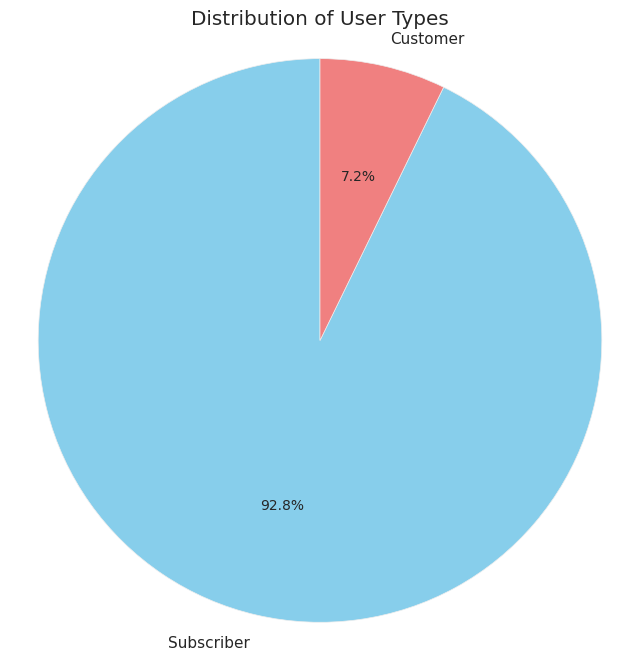

In [ ]:
user_counts = df['user_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of User Types')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is perfect for showing proportional relationships in a visually intutive way. It helps highlight which user type dominates usage - an important insight for marketing and product planning.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that a majority of the users are subscribers, indicating that most people use Ford Gobike as a regular commuting option. Customers make up a smaller share, suggesting the service is used less frequently for one-time or leisure purposes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding that subscribers from the core user base helps focus efforts on retaining them by enhancing service reliability, Bike availability during peak hours and exclusive member benefits.

At the same time, there's an opportunity to grow the customer base through promotions, weekend deals or tourist-targeted packages. There's no immediate sign of negative growth, but increasing casual ridership could help diversify revenue.

#### Chart - 7 - Trip duration by Gender and User type
**(Violin plot)**

In [ ]:
# Chart - 7 visualization code

In [ ]:
df_violin = df[df['trip_duration_min'] <= 60]

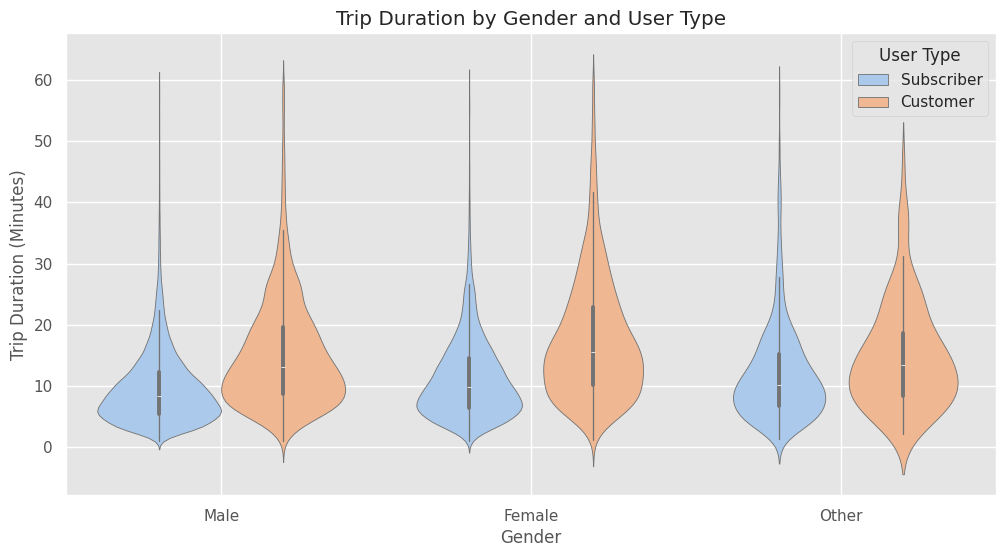

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='member_gender', y='trip_duration_min', hue='user_type', data=df_violin, palette='pastel')
plt.title('Trip Duration by Gender and User Type')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (Minutes)')
plt.legend(title='User Type')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a violin plot because it combines the benefits of a boxplot and a density plot, making it perfect for comparing trip duration distributions across gender and user type simultaneously. Unlike bar plots which only show averages, violin plots provide a richer picture of the data spread, skewness, outliers and central tendency - all in one visual.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that customers consistently have longer and more variable trip durations across all gender categories compared to subscribers. While subscribers show tighter, shorter distributins centered around 10-15 minutes, customers show broader distributions and heavier tails - especially among female and other gender groups. This suggests that customers may be using the service for leisure or irregular purposes while subscribers use it more predictably and consistently.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, these insights enable targeted strategies for both service planning and user engagement:
-  For subscriber, bike availability should focus on peak commute hours and station placement near business districts.
-  For customers, longer and varied trip patterns suggest opportunities for marketing leisure ride packages, weekend promotions or event-based campaigns.
-  The data may also encourageinclusive initiatives or safety features to better support underrepresented gender groups who show interest but possibly face usage barriers.

Overall, the insight supports growth-oriented decisions by aligning service offerings with actual user behaviour.

#### Chart - 8 - Age group distribution by User type
**(Donut char)**

In [ ]:
# Chart - 8 visualization code

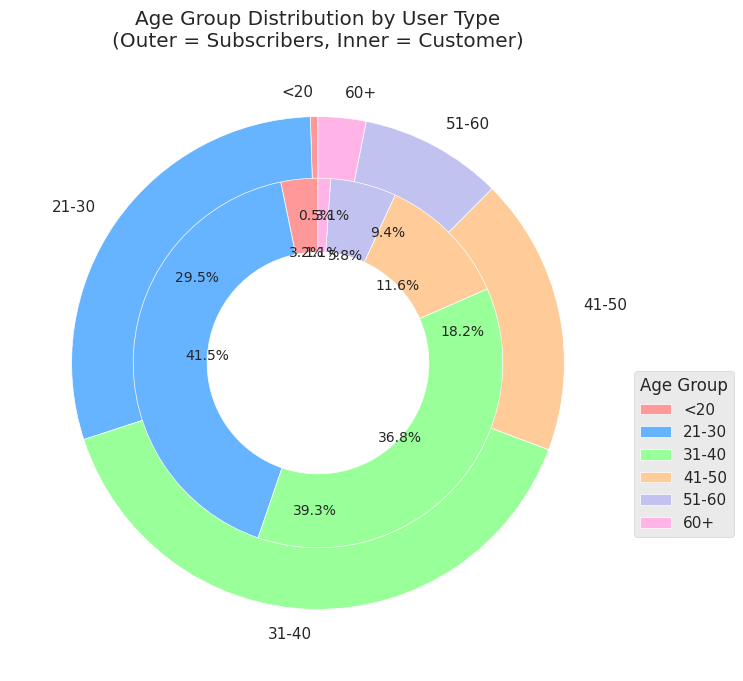

In [ ]:
df['age_group'] = pd.cut(df['rider_age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['<20', '21-30', '31-40', '41-50', '51-60', '60+'])

age_counts_subscriber = df[df['user_type'] == 'Subscriber']['age_group'].value_counts().sort_index()
age_counts_customer = df[df['user_type'] == 'Customer']['age_group'].value_counts().sort_index()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']


fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(age_counts_subscriber, labels=age_counts_subscriber.index, radius=1, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), startangle=90, colors=colors)
ax.pie(age_counts_customer, labels=None, radius=0.75, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), startangle=90, colors=colors)

plt.title('Age Group Distribution by User Type\n(Outer = Subscribers, Inner = Customer)')
plt.legend(age_counts_subscriber.index, title='Age Group', bbox_to_anchor=(1,0.5))
plt.show()

##### 1. Why did you pick the specific chart?

A donut chart with concentric rings lets us compare relative age group shares between subscribers and customers in one elegant visual. Its's more engaging than bars for presentations and keeps the viewer focused on demographic proportions.

##### 2. What is/are the insight(s) found from the chart?

-  The 21-30 and 31-40 age groups from the largest segments for both users type.
-  Subscribers dominate the outer ring in most age categories, especially in the working-age brackets.
-  Customers are more evenly spread but smaller in volume across all groups.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the visual clarity helps stakeholders quickly identify where to focus:
-  Design services and benefits for users 21-40.
-  Consider age-specific outreach to increase participation in underrepresented segments like <20 or 60+ .
-  This format also helps track age-related trends over time by layering historical data.

 #### Chart - 9 - Top 20 most frequent start-to-end station pairs
 **(Lollipop chart)**

In [ ]:
# Chart - 9 visualization code

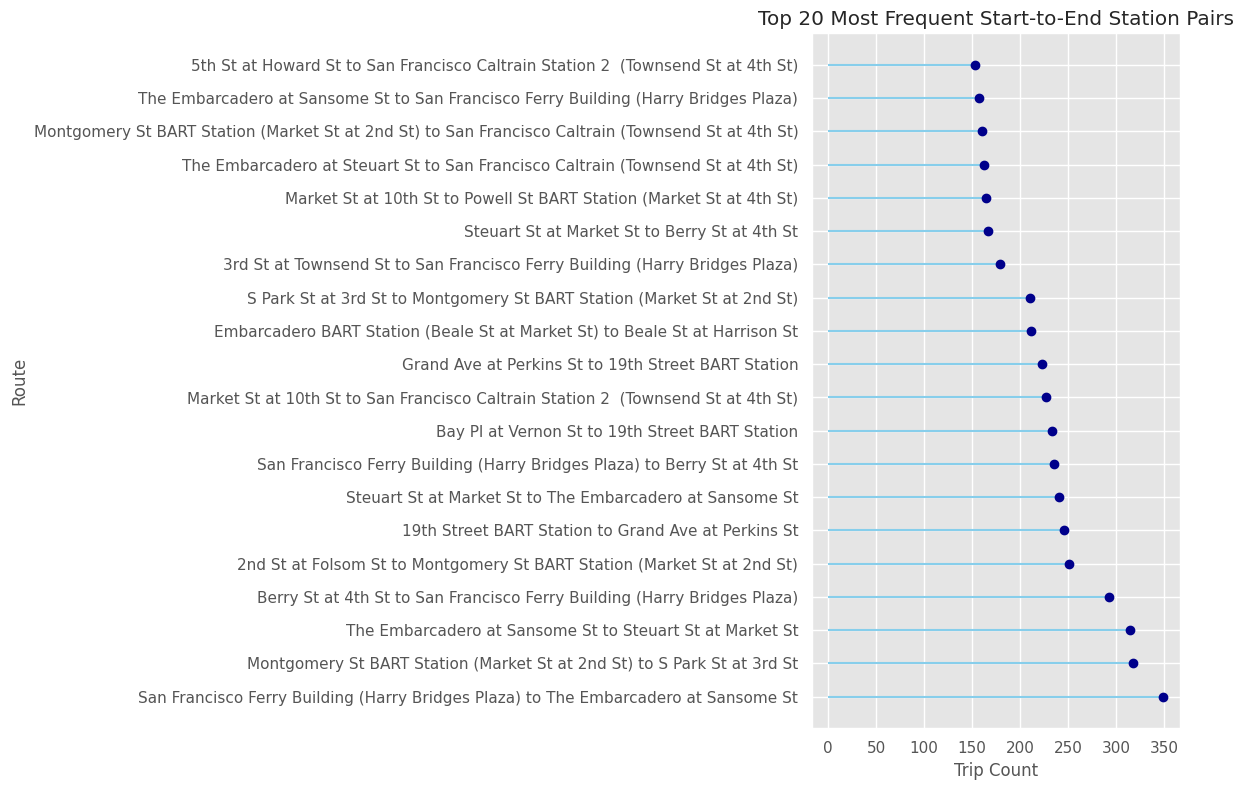

In [ ]:
df['route'] = df['start_station_name'] + ' to ' + df['end_station_name']

top_routes = df['route'].value_counts().head(20).reset_index()
top_routes.columns = ['route', 'trip count']

plt.figure(figsize=(12,8))
plt.hlines(y=top_routes['route'], xmin=0, xmax=top_routes['trip count'], color='skyblue')
plt.plot(top_routes['trip count'], top_routes['route'], 'o', color='darkblue')
plt.title('Top 20 Most Frequent Start-to-End Station Pairs')
plt.xlabel('Trip Count')
plt.ylabel('Route')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A lollipop chart is a modern, minimalist alternative to bar plots. It makes it easy to compare the volume of trips on different start-to-end station pairs while keeping the visual clean and readable. It's perfect when showcasing a ranked list like the top 20 routes, especially in presentations.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the most popular routes wwithin the bike-sharing network. Many of these top routes are likely located near transit hubs, commercial zones or downtown areas. Repeated patterns suggest commutig corridors with high demand during peak hours. For instance, if the same station appear frequently, it implise they're central to rider movement and city flow.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, these insights are vital for:
-  Bike rebalancing operations- ensuring that high-demand routes have sufficient bike availability at both ends.
-  Strategic station planning- adding or expanding docking capacity at heavily used stations.
-  Marketing opportunities- promoting these routes to new users as popular rides or suggesing scenic or efficient commutes.

No negative trends are observed, but underused stations might benefit from awareness campaigns or incentives.

#### Chart - 10 - Age,Time and Trip duration by user type
**(Scatter plot)**

In [ ]:
# Chart - 10 visualization code

In [ ]:
df_3d = df[(df['trip_duration_min'] <= 60) & (df['rider_age'] <= 80)]

fig = px.scatter_3d(df_3d, x='rider_age', y='start_hour', z='trip_duration_min', color='user_type', title='Age, Time and Trip Duration by User Type', labels={'rider_age': 'Age', 'start_hour': 'Start Hour', 'trip_duration_min': 'Trip Duration (Minutes)'}, opacity=0.6)
fig.update_traces(marker=dict(size=3))
fig.show()


##### 1. Why did you pick the specific chart?

A 3D scatter plot allows us to simultaneously explore the relationship between three continuous variables- age, hour of day and trip duration- with color representing user type. This is perfect for identifying behavioural clusters, outliers and subtle interactions not easily seen in 2D.


##### 2. What is/are the insight(s) found from the chart?

-  Most rides are concentrated among users aged 25 to 40, with trip durations under 20 minutes.
-  Subscribers show stronger clustering around commute hours with short durations.
-  Customers are more scattered, showing longer trip durations across a wider range of times and ages.
-  Outliers appear at odd hours or for riders aged above 60 with long durations- these could indicate leisure rides or system anomalies.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely,
-  Behavior segmentation is easier when clusters are visually appartment- helps in customizing services for different age and time behaviours.
-  Detecting outlier patterns can inform feature ideas or detect system misuse.
-  Encourages using tools like predictive analytics based on trip behavior clusters revealed visually.


#### Chart - 11 - Distribution of rider age


In [ ]:
# Chart - 11 visualization code

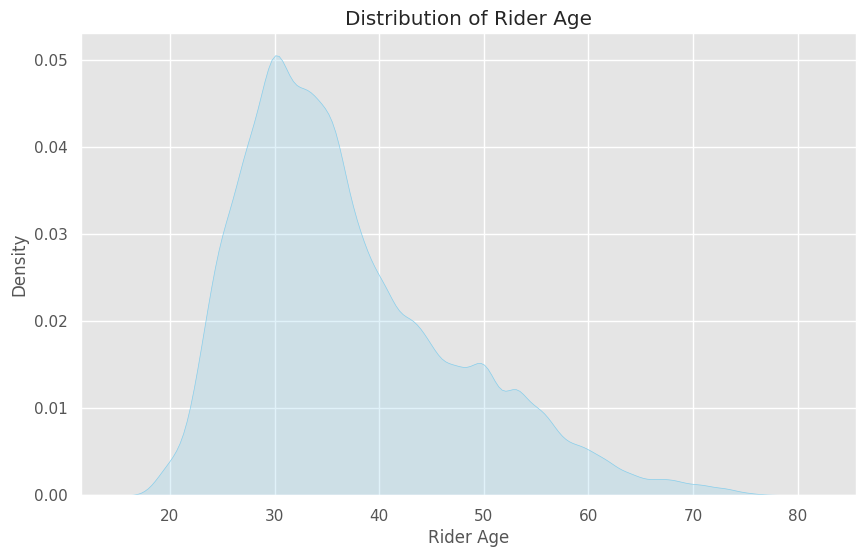

In [ ]:
df_age = df[(df['rider_age'] >10) & (df['rider_age'] < 80)]

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_age, x='rider_age', fill=True, color='skyblue')
plt.title('Distribution of Rider Age')
plt.xlabel('Rider Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A KDE plot shows a smoothed curve of the age distribution, making it easier to spot modes and the overall shape of the data. It's a great way to analyze univariate continuous variabes and is more visually intutive than a histogram for identifying spread and skewness.

##### 2. What is/are the insight(s) found from the chart?

-  The age distribution is right-skewed, with most riders falling between 25 and 4 years old.
-  There are very few users below age 20 or above 60, indicating a limited appeal to very young or older riders.
-  The curves suggests a strong peak around 30 years, showing that this is likely the core user age.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help the company:
-  Refine marketing toward the dominant 25-40 age range.
-  Identify growth potential in underrepresented age groups.
-  Design loyalty programs or partnerships tailored to key demographics.

#### Chart - 12 - Top 10 start station
**(Horizontal bar chart)**

In [ ]:
# Chart - 12 visualization code

<ipython-input-61-e600d3b8b433>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




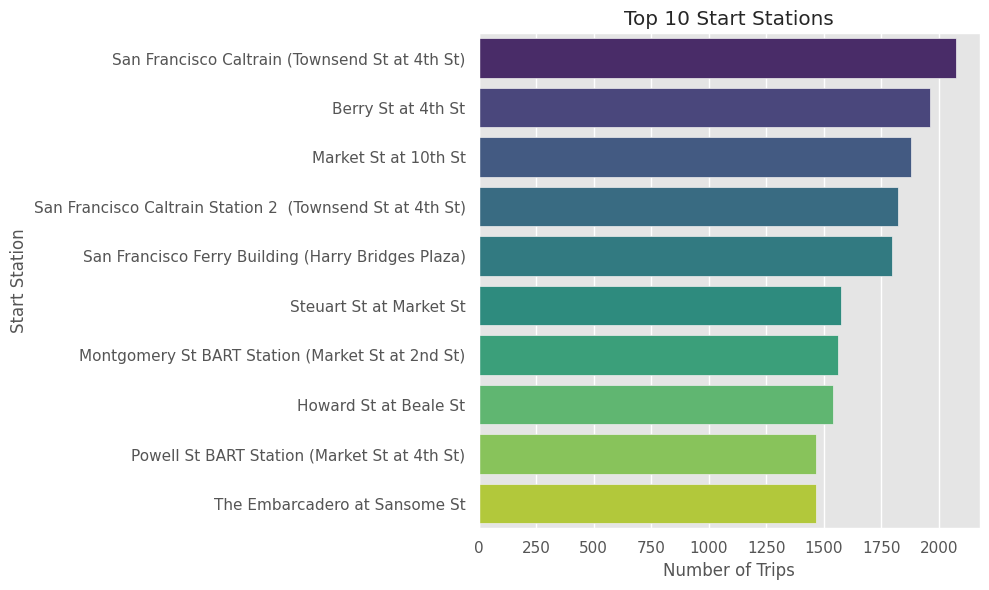

In [ ]:
top_start_stations = df['start_station_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_start_stations.values, y=top_start_stations.index, palette='viridis')
plt.title('Top 10 Start Stations')
plt.xlabel('Number of Trips')
plt.ylabel('Start Station')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for ranking and comparing categorical variables like station names, especially when labels are long. it's clean, readable and communicates station usage intensity effectively.

##### 2. What is/are the insight(s) found from the chart?

-  A few start stations are highly dominant, handling significantly more trips than others.
-  These stations are likely located in budiness hubs, downtown areas or near transit terminals.
-  There's large drop-off after the top few stations, which could indicate uneven station demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Knowing which start stations are most used helps:
-  Plan bike reblancing more effectively.
-  Consider expansion or added capacity at high-traffic station.
- Improve user experience by reducing wait times and ensuring bike availability.

#### Chart - 13 - Geographical scatter plot of start station


In [ ]:
# Chart - 13 visualization code

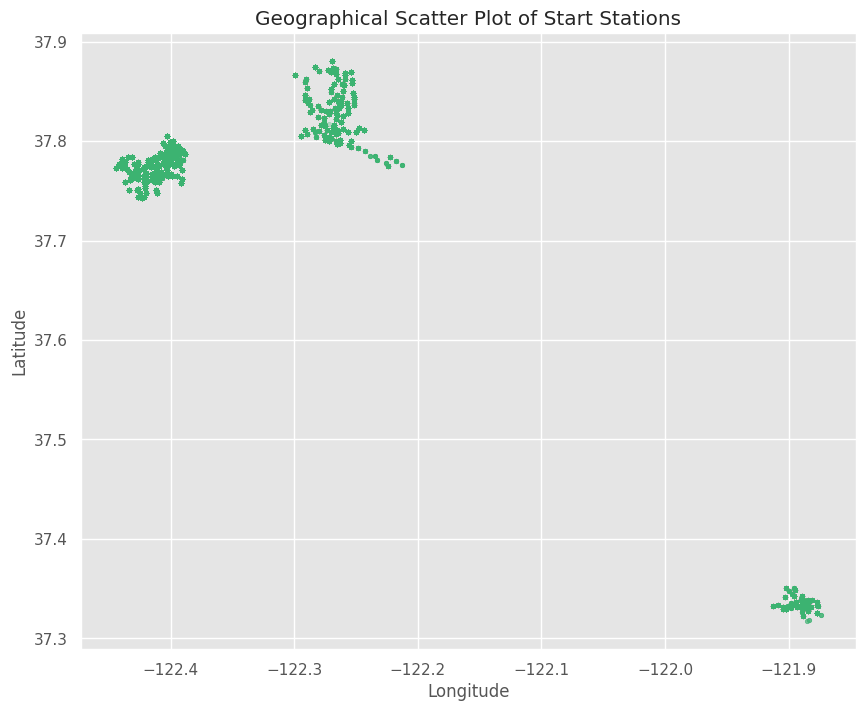

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df['start_station_longitude'], df['start_station_latitude'],alpha=0.3, s=10, color='mediumseagreen')
plt.title('Geographical Scatter Plot of Start Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A geo-scatter plot helps visualize the spatial spread of start stations without needing a base map. It's a great way to understand how the bike-sharing system is geographically structured- revealing dense urban zones and outlier stations.

##### 2. What is/are the insight(s) found from the chart?

-  Most strt stations are clustered in the downtown core or near transport hubs,which indicates smart placement around demand centers.
-  A few stations exist on the outer edge - possibly less-used or neighborhood-based.
-  You can spot service coverage gaps or over-saturation zones depending on spacing.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Definitely:
-  Helps optimize bike rebalancing and dock expansion strategies.
-  Allows urban planners to identify potential new station location.
-  Enhanes understanding ot user access vs urban layout.

#### Chart - 14 - Correlation Heatmap of Numerical features
**(Heatmap)**

In [ ]:
# Correlation Heatmap visualization code

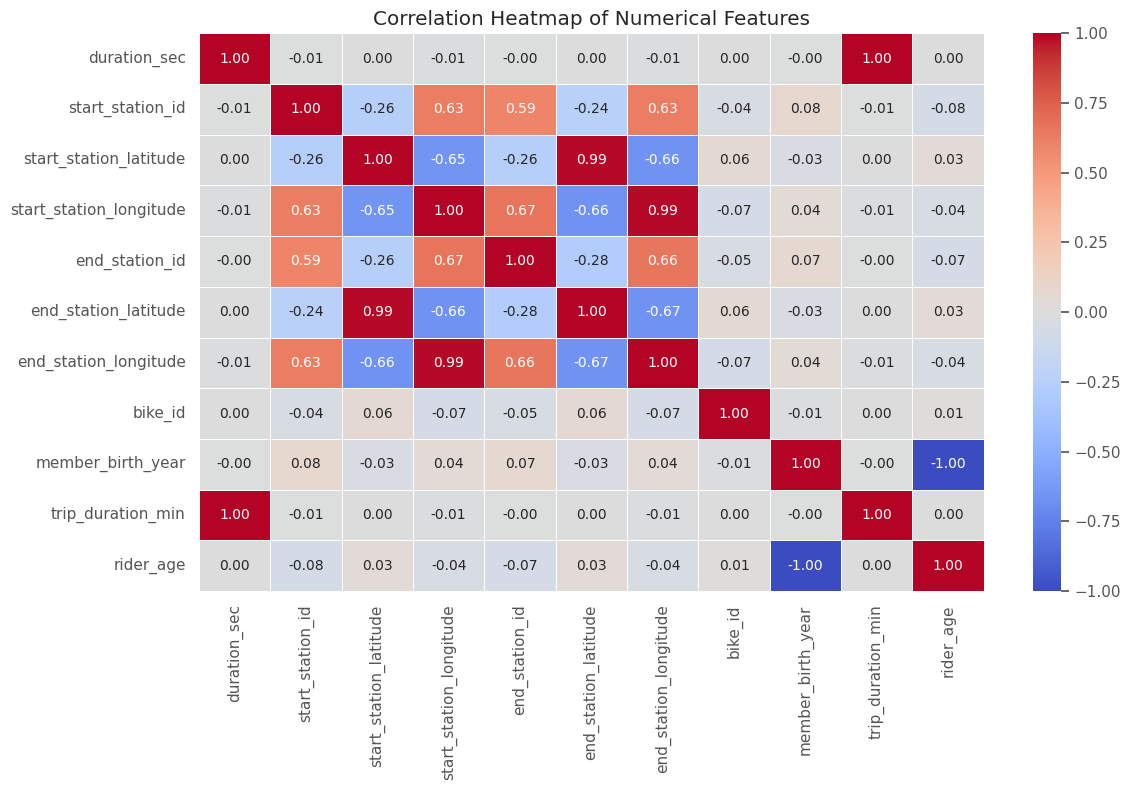

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_cols]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is ideal for exploring relationships between multiple numeric variables in a single vieW. It helps spot strong poitive or negative associations, which is useful not just for understanding behaviour, but also for feature selection in modeling.

##### 2. What is/are the insight(s) found from the chart?

-  Trip_duration_min is positively correlated with duration_sec.
-  There's little to no  strong correlation between rider age, station coordinates and duration- indicating that trip time is not heavily dependent on age or exact location.
-  Some station coordinate pairs may show mild correlations, indicating spatial clustering of station.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,
-  Identifying weakly or non-correlated features avoids false assumpation in planning and modeling.
-  Highlights the need to use categorical/time-based features to explain trip behaviour rather than numeric variables alone.
-  Servers as a diagnostic tool for further feature engineering or system monitoring.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

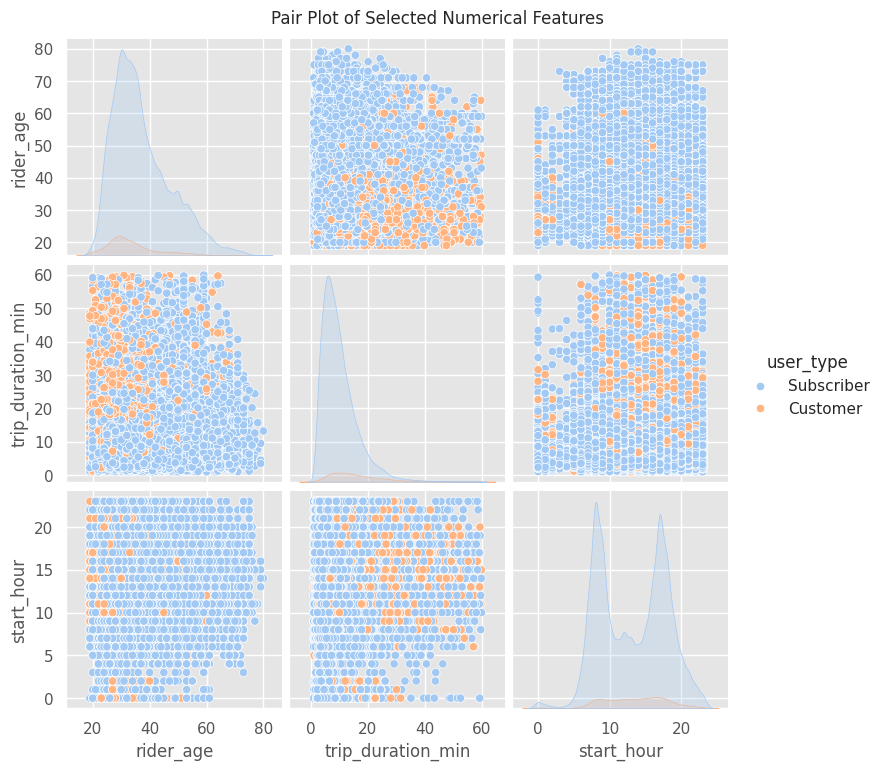

In [ ]:
pair_data = df[['rider_age','trip_duration_min','start_hour','user_type']].dropna()

pair_data = pair_data[(pair_data['trip_duration_min'] <= 60) & (pair_data['rider_age'] <= 80 )]

sns.pairplot(pair_data, hue='user_type', palette='pastel')
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is perfect for simultaneously comparing multiple numerical variables and observing distribution, correlation and clustering, especially when split by a category like user_type. It gives a multidimensional view in one frame.

##### 2. What is/are the insight(s) found from the chart?

-  Subscribers cluster tightly around short trip durations and commute hours.
-  Customers show wider, more scattered usage- especially in trip duration and across rider ages.
-  There's no strong linear correlation among features but clear groping based on behaviour.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To help the Ford GoBike system achive its business objective- such as increasing ridership, improving operational efficiency and expanding its user base- several strategic actions can be taken based on the insights from the exploratory data analysis.


First, it's essential to optimize bike availability for commuters. The data shows that subscribers ride mostly during weekday commute hours(8-9 AM and 5-6PM), especially near business districts and transit stations. Ensuring more bikes are availabile during these peak hours at high-demand station will improve user satisfaction and retention.
Automated rebalancing based on predicted hourly demand can make this process efficient and cost-effective.

At the same time, there is an opportunity to increase engagement among casual users and tourists, who tend to ride more on weekends and during midday. Introducing weekend passes, short-term promotions or event-based campaigns can drive usage in these segments. Collaborations with local tourism and hospitality partners can further expand reach and attract leisure riders.

Another key insight is the demographic skew: most riders are males aged 25 to 40. To addressed this, targeted efforts can be made to attract underrepresented groups, such as women, non-binary individuals and older adults. Initiative could include improving preceptions of safety, promoting inclusive community rides and offering age-friendly ride plans or e-bike options to make riding more accessible to seniors.

In terms of infrastructure, certain stations- especially those near transportation hubs like Caltrain- are heavily used. These high-traffic locations should be prioritized for expansion, including additional docks and features such as real-time bike availability displays to streamline rider experience.

Since subscribers make up the majority of users, enhancing their long-term engagement is also critical. The company could introduce loyalty programs, personalised ride stats, carbon footprint tracking and premium plans with perks like bike reservations or ride credits. These small benefits can greatly improve user retention and brand loyalty.

Operationally, some bikes are significantly overused, increasing the risk of wear and breakdowns. Tracking usage frequency and implementing a preventive maintenance cycle or rotating bike placements between stations can help maintain service quality and reduce maintenance costs.

Lastly, the company should use this behavioural data to power personalized marketing. Based on riding history, age or gende, campaigns can be crafted to re-engage users with nudges, discounts or content that aligns with their usage pattern. Promoting the most popular routes or scenic rides in the app can further inspire usage and exploration.

# **Conclusion**

The Exploratory data analysis of the Ford GoBike system for January 2018 provided valuable insights into user behaviour, system usage patterns and operational performance. The dataset revealed that the majority of riders are subscribers, primarily aged between 25 and 40, who use the service during weekday commute hours. In contrast, customers- typically casual or one-time users -  mshow a preference for midday and weekend rides, suggesting leisure-oriented usage.

Most trips are short, averaging under 20 minutes, indicating the system is primarily used for short-distance travel or last-mile connectivity. Popular stations are concentrated in commercial areas and near major transit hubs, pointing to strategic station placement aligned with commuter needs. Additionally, the analysis showed a noticeable underrepresentation of female, non-binary and older rides, suggesting opportunities for more inclusive outreach and service design.

From an operational perspective, certain bikes and routes are used disproportionately, signaling the need for smart maintenance scheduling and better asset rotation.Furthermore, the heatmaps and multivariate visuals revealed predictable demand patterns by time and user demographics, which can inform targeted resource allocation and marketing strategies.

Overall, this analysis provides a strong foundation for data-driven decision-making.By leveraging these insights, FordGoBike can enhance customer experience, expand its user base, improve fleet and station efficiency and support long-term growth in urban mobility.